In [1]:
import pandas as pd
import requests as r
import json
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
csv = 'cityid.csv'

In [3]:
df = pd.read_csv(csv, encoding='utf-8')

/Users/gta/dev/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2698: DtypeWarning: Columns (10,12) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [4]:
city_list = df.sample(500).reset_index()['id'].tolist()

url = 'http://api.openweathermap.org/data/2.5/weather?id='
api_key = '&APPID=0c715aff73757bce5f32aba6da14fd45'
units = '&units=imperial'

url_list = [(url + str(city) + units + api_key) for city in city_list]
url_dict = {'city_id': city_list, 'url': url_list}

city_df = pd.DataFrame(url_dict)

In [5]:
city_df['city'] = ''
city_df['country'] = ''
city_df['lat'] = ''
city_df['lon'] = ''
city_df['temp'] = ''
city_df['wind'] = ''
city_df['clouds'] = ''
city_df['humidity'] = ''

In [6]:
city_df.head()

,city_id,url,city,country,lat,lon,temp,wind,clouds,humidity
0,4159786,http://api.openweathermap.org/data/2.5/weather...,,,,,,,,
1,671402,http://api.openweathermap.org/data/2.5/weather...,,,,,,,,
2,3522777,http://api.openweathermap.org/data/2.5/weather...,,,,,,,,
3,725213,http://api.openweathermap.org/data/2.5/weather...,,,,,,,,
4,2645721,http://api.openweathermap.org/data/2.5/weather...,,,,,,,,


In [7]:
city_df['url'][4]

'http://api.openweathermap.org/data/2.5/weather?id=2645721&units=imperial&APPID=0c715aff73757bce5f32aba6da14fd45'

In [8]:
for index, row in city_df.iterrows():
    response = r.get(row['url']).json()    
#     print(response)
#     print(row['url'])
    try:
        city_df.set_value(index, "city", response['name'])
        city_df.set_value(index, 'country', response['sys']['country'])
        city_df.set_value(index, 'lat', response['coord']['lat'])
        city_df.set_value(index, 'lon', response['coord']['lon'])
        city_df.set_value(index, 'temp', response['main']['temp'])
        city_df.set_value(index, 'wind', response['wind']['speed'])
        city_df.set_value(index, 'clouds', response['clouds']['all'])
        city_df.set_value(index, 'humidity', response['main']['humidity'])
    except:
        print("Missing field... skipping.")

In [9]:
city_df.head()

,city_id,url,city,country,lat,lon,temp,wind,clouds,humidity
0,4159786,http://api.openweathermap.org/data/2.5/weather...,Inverness,US,28.84,-82.33,56.1,3.15,90,82
1,671402,http://api.openweathermap.org/data/2.5/weather...,Pancesti,RO,46.33,27.08,41,19.46,0,93
2,3522777,http://api.openweathermap.org/data/2.5/weather...,Necaxa,MX,20.22,-98,54.74,2.93,88,100
3,725213,http://api.openweathermap.org/data/2.5/weather...,Beloslav,BG,43.18,27.7,55.4,3.36,20,71
4,2645721,http://api.openweathermap.org/data/2.5/weather...,Kidsgrove,GB,53.09,-2.24,33.31,2.24,0,80


In [14]:
city_df.shape

(500, 10)

In [10]:
city_lat_list = city_df['lat'].tolist()
city_temp_list = city_df['temp'].tolist()
city_humidity_list = city_df['humidity'].tolist()
city_windspeed_list = city_df['wind'].tolist()
city_cloud_list = city_df['clouds'].tolist()

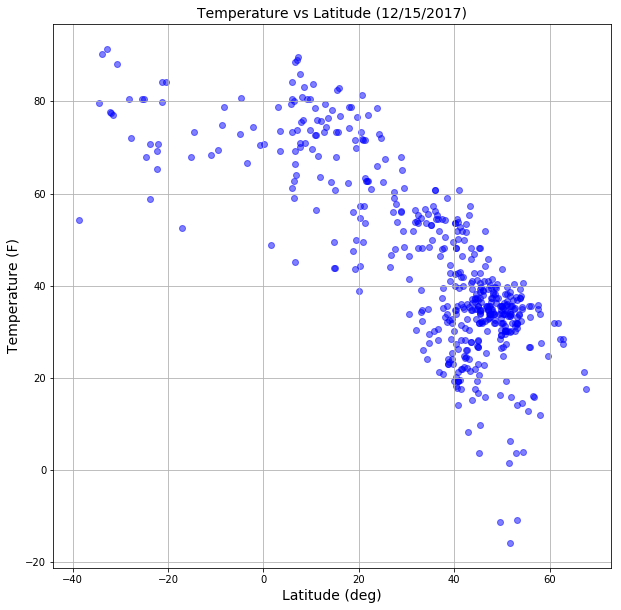

In [26]:
plt.figure(figsize=(10,10))
plt.scatter(city_lat_list, city_temp_list, color='b', alpha = 0.5)
plt.xlabel("Latitude (deg)" ,fontsize = 14)
plt.ylabel("Temperature (F)", fontsize = 14)
plt.title("Temperature vs Latitude (12/15/2017)", fontsize = 14)
plt.grid(True)
plt.show()

* Temperature (F) vs. Latitude
* Humidity (%) vs. Latitude
* Cloudiness (%) vs. Latitude
* Wind Speed (mph) vs. Latitude

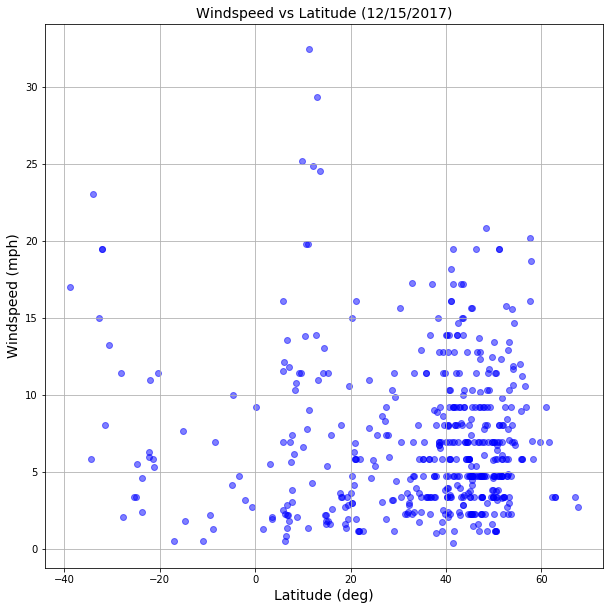

In [27]:
plt.figure(figsize=(10,10))
plt.scatter(city_lat_list, city_windspeed_list, color='b', alpha = 0.5)
plt.xlabel("Latitude (deg)" ,fontsize = 14)
plt.ylabel("Windspeed (mph)", fontsize = 14)
plt.title("Windspeed vs Latitude (12/15/2017)", fontsize = 14)
plt.grid(True)
plt.show()

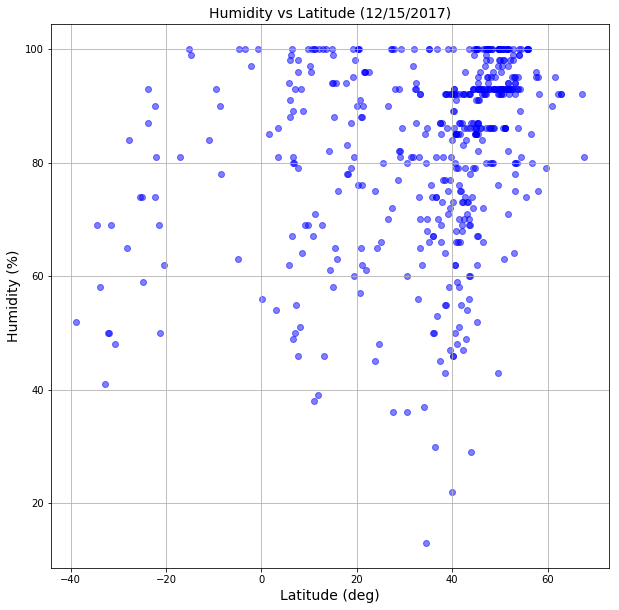

In [28]:
plt.figure(figsize=(10,10))
plt.scatter(city_lat_list, city_humidity_list, color='b', alpha = 0.5)
plt.xlabel("Latitude (deg)" ,fontsize = 14)
plt.ylabel("Humidity (%)", fontsize = 14)
plt.title("Humidity vs Latitude (12/15/2017)", fontsize = 14)
plt.grid(True)
plt.show()

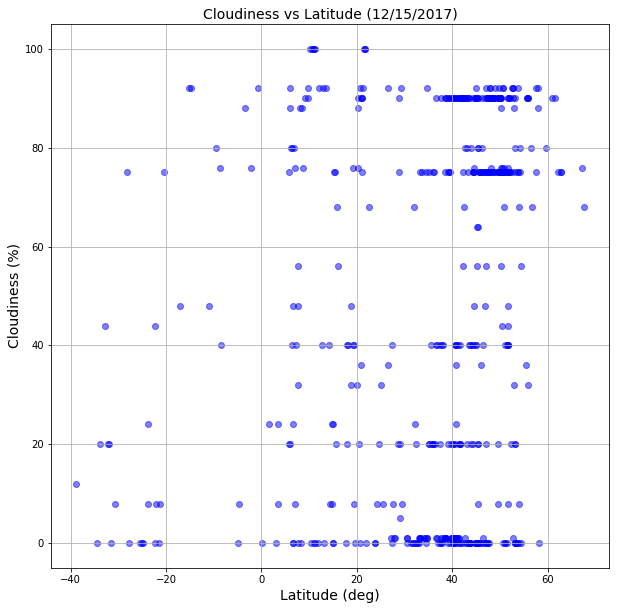

In [29]:
plt.figure(figsize=(10,10))
plt.scatter(city_lat_list, city_cloud_list, color='b', alpha = 0.5)
plt.xlabel("Latitude (deg)" ,fontsize = 14)
plt.ylabel("Cloudiness (%)", fontsize = 14)
plt.title("Cloudiness vs Latitude (12/15/2017)", fontsize = 14)
plt.grid(True)
plt.show()